#import

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import sklearn.metrics as metrics

load MNIST handwritten digits dataset

In [ ]:
BATCH_SIZE = 32

transforms = transforms.Compose([transforms.ToTensor()])
#Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].

#dowload
trainset = torchvision.datasets.MNIST(root='./data', train = True, download=True, transform=transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root = './data', train = False, download = True, transform=transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)


In [ ]:
print(len(trainset))

60000


#define model

In [ ]:
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    #28x28x1 -> 26x26x32
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
    self.d1 = nn.Linear(26*26*32, 128) #in_feature = 26x26x32, out=128
    self.d2 = nn.Linear(128, 10)

  def forward(self, x):
    #32x1x28x28 -> 32x32x26x26
    x = self.conv1(x)
    x = F.relu(x)
    
    #flatten -> 32x(32*26*26)
    x = x.flatten(start_dim = 1)
    
    #32x(32*26*26) -> 32x128
    x = self.d1(x)
    x = F.relu(x)
  
    #logit -> 32x10
    logits = self.d2(x)
    out = F.softmax(logits, dim=1)
    return out
    
    

#train model

start by instantiating a model instance model, a loss function module criterion and optimizer optimizer, which will adjust the parameters of our model in order to minimize the loss output by criterion.

In [ ]:
learning_rate = 0.001
num_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Training loop:
For each minibatch (accessed by enumerating through our data loader trainloader), we run our data through model in a forward pass, then compute the loss with criterion. We call optimizer.zero_grad() to zero out the gradients from the previous round of training, followed by loss.backward() to backpropagate the new round of gradients and finally optimizer.step() to adjust the model parameters based on these gradients.

In [ ]:
for epoch in range(num_epochs):
  train_running_loss = 0.0
  train_acc = 0.0

  #training step
  for i, (images, labels) in enumerate(trainloader):
    images = images.to(device)
    labels = labels.to(device)

    #forwar + backprop + loss
    logits = model(images) #output predict y_hat
    loss = criterion(logits, labels) #cross entropy (y_hat, y)
    optimizer.zero_grad()
    loss.backward() #accumualte (ex:sum) the gradients

    #update model params
    optimizer.step()

    train_running_loss+= loss.detach().item()
    train_acc += (torch.argmax(logits, 1).flatten()==labels).type(torch.float).mean().item()

  print('Epoch: %d | Loss: %.4f | Train Acc: %.2f' \
          %(epoch, train_running_loss/i, train_acc/i))

Epoch: 0 | Loss: 1.7136 | Train Acc: 0.75
Epoch: 1 | Loss: 1.5007 | Train Acc: 0.96
Epoch: 2 | Loss: 1.4850 | Train Acc: 0.98
Epoch: 3 | Loss: 1.4796 | Train Acc: 0.98
Epoch: 4 | Loss: 1.4771 | Train Acc: 0.99


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += (torch.argmax(outputs, 1).flatten() == labels).type(torch.float).mean().item()
    preds = torch.argmax(outputs, 1).flatten().cpu().numpy()
        
print('Test Accuracy: %.2f'%(test_acc/i))

Test Accuracy: 0.99


#Setup
Let's first install PyTorch Geometric (which we'll use for creating graph neural networks) and TensorboardX (which we'll use to visualize training progress):

#pip install

In [1]:
import os
import torch
print("Pytorch has version {}".format(torch.__version__))

Pytorch has version 1.12.1+cu113


In [2]:
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
!pip install torch-geometric
!pip install ogb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 7.9 MB 16.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 3.5 MB 22.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 467 kB 29.3 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=f3c37c171413962a6c3e77addf76eb8f350d9e8d7c56e89baf03fc96b44da79d
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric
Looking in indexes: https://pypi.org/simple, https://us-pyth

In [4]:
!pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 40.1 MB/s 


In [48]:
!pip install --verbose --no-cache-dir torch-scatter
!pip install --verbose --no-cache-dir torch-sparse
!pip install --verbose --no-cache-dir torch-cluster
!pip install torch-geometric
!pip install tensorboardX
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

#import

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch_geometric.nn as pyg_nn #GNN layer
import torch_geometric.utils as pyg_utils #Loss/Evaluation Metrics/ Utility Function

import time
from datetime import datetime

import networkx as nx #Visualize Graph Structure 
import numpy as np
import torch
import torch.optim as optim

from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import DataLoader

import torch_geometric.transforms as T

from tensorboardX import SummaryWriter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

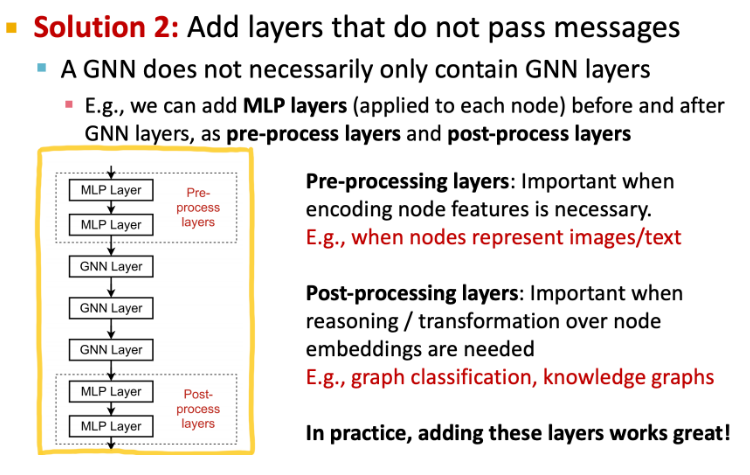

#define model
- The GNNStack is our general framework for a GNN which can handle different types of convolutional layers, and both node and graph classification. The build_conv_model method determines which type of convolutional layer to use for the given task -- here we choose to use a graph convolutional network for node classification, and a graph isomorphism network for graph classification. 
- The model consists of 3 layers of convolution, followed by mean pooling in the case of graph classification, followed by two fully-connected layers. Since our goal here is classification, we use a negative log-likelihood loss function.

In [50]:
class GNNStack(nn.Module): #stacking of Graph Convolutions
    def __init__(self, input_dim, hidden_dim, output_dim, task='node'):
        super(GNNStack, self).__init__()
        self.task = task
        self.convs = nn.ModuleList()
        self.convs.append(self.build_conv_model(input_dim, hidden_dim))
        self.lns = nn.ModuleList()
        self.lns.append(nn.LayerNorm(hidden_dim))
        self.lns.append(nn.LayerNorm(hidden_dim))
        for l in range(2):
            self.convs.append(self.build_conv_model(hidden_dim, hidden_dim))

         # MLP layers: Post process layers
        self.post_mp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim), nn.Dropout(0.25), 
            nn.Linear(hidden_dim, output_dim))
        if not (self.task == 'node' or self.task == 'graph'):
            raise RuntimeError('Unknown task.')

        self.dropout = 0.25
        self.num_layers = 3

    def build_conv_model(self, input_dim, hidden_dim):
        # refer to pytorch geometric nn module for different implementation of GNNs.
        if self.task == 'node':
            return pyg_nn.GCNConv(input_dim, hidden_dim)
        else:
            return pyg_nn.GINConv(nn.Sequential(nn.Linear(input_dim, hidden_dim),
                                  nn.ReLU(), nn.Linear(hidden_dim, hidden_dim)))

    '''
    data.x: node feature matrix [num_nodes, num_node_features]
    data.edge_index: graph connectivity [2, num_edges]
    data.edge_attr: edge attribute matrix [num_edges, num_edge_features]
    '''
    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        if data.num_node_features == 0:
          x = torch.ones(data.num_nodes, 1)#Feature augmentation: constant

        for i in range(self.num_layers):
            x = self.convs[i](x, edge_index)
            emb = x
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
            if not i == self.num_layers - 1:
                x = self.lns[i](x)

        if self.task == 'graph':
            x = pyg_nn.global_mean_pool(x, batch) #apply aggregation : mean, max, sum

        x = self.post_mp(x)

        return emb, F.log_softmax(x, dim=1)

    def loss(self, pred, label):
        return F.nll_loss(pred, label)#The negative log likelihood loss.

#custom model

Define a single layer of graph convolution, which can be decomposed into:

- Message computation
- Aggregation
- Update
- Pooling
Here we give an example of how to subclass the pytorch geometric MessagePassing class to derive a new model

We make use of MessagePassing's key building blocks:

- aggr='add': The aggregation method to use ("add", "mean" or "max").
- propagate(): The initial call to start propagating messages. Takes in the edge indices and any other data to pass along (e.g. to update node embeddings).
- message(): Constructs messages to node i. Takes any argument which was initially passed to propagate().
- update(): Updates node embeddings. Takes in the output of aggregation as first argument and any argument which was initially passed to propagate().

In [51]:
class CustomConv(pyg_nn.MessagePassing): #inherening from MessagePassing
    def __init__(self, in_channels, out_channels):
        super(CustomConv, self).__init__(aggr='add')  # "Add" aggregation.
        self.lin = nn.Linear(in_channels, out_channels)
        self.lin_self = nn.Linear(in_channels, out_channels)

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        '''
        Orginal code
        Add self-loops to the adj. matrix: neighbors + self
        pyg.utils.add_self_loops(edge_index, num_nodes = x.size(0)) #A+I
        '''

        # remove self-loops: skip layer on top of that
        edge_index, _ = pyg_utils.remove_self_loops(edge_index) #remove every self-loop given by edge_index so that (i, i) not in E

        # Transform node feature matrix.
        self_x = self.lin_self(x) #B
        #x = self.lin(x)          #W

        #F(x) + x: A GCN with skip connection
        return self_x + self.propagate(edge_index, size=(x.size(0), x.size(0)), x=self.lin(x))

    def message(self, x_i, x_j, edge_index, size):
        
        '''
        GCN : D^(-1/2)*A*D(1/2)*W*X
        x_i : self  
        x_j : neighborhood 
        '''
        # Compute messages
        # x_j has shape [E, out_channels]

        row, col = edge_index
        deg = pyg_utils.degree(row, size[0], dtype=x_j.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        return x_j

    def update(self, aggr_out):
        # aggr_out has shape [N, out_channels] : add additional layer after message passing 
        # GraphSAGE : L2 Normalization 
        # F.normalize(aggr_out, p=2, dim=-1) 
        return aggr_out

#Training setup
We train the model in a standard way here, running it forwards to compute its predicted label distribution and backpropagating the error. Note the task setup in our graph setting: for node classification, we define a subset of nodes to be training nodes and the rest of the nodes to be test nodes, and mask out the test nodes during training via batch.train_mask. For graph classification, we use 80% of the graphs for training and the remainder for testing, as in other classification settings.

In [77]:
def train(dataset, task, writer):
    if task == 'graph':
        data_size = len(dataset)
        loader = DataLoader(dataset[:int(data_size * 0.8)], batch_size=64, shuffle=True)
        test_loader = DataLoader(dataset[int(data_size * 0.8):], batch_size=64, shuffle=True)
    else:
        test_loader = loader = DataLoader(dataset, batch_size=64, shuffle=True)

    # build model
    model = GNNStack(max(dataset.num_node_features, 1), 32, dataset.num_classes, task=task)
    opt = optim.Adam(model.parameters(), lr=0.01)
    
    # train
    for epoch in range(200):
        total_loss = 0
        model.train()
        for batch in loader:
            #print(batch.train_mask, '----')
            opt.zero_grad()
            embedding, pred = model(batch)
            label = batch.y
            if task == 'node':
                pred = pred[batch.train_mask]
                label = label[batch.train_mask]
            loss = model.loss(pred, label)
            loss.backward()
            opt.step()
            total_loss += loss.item() * batch.num_graphs
        total_loss /= len(loader.dataset)
        writer.add_scalar("loss", total_loss, epoch)

        if epoch % 10 == 0:
            test_acc = test(test_loader, model)
            print("Epoch {}. Loss: {:.4f}. Test accuracy: {:.4f}".format(
                epoch, total_loss, test_acc))
            writer.add_scalar("test accuracy", test_acc, epoch)

    return model

Test time, for the CiteSeer/Cora node classification task, there is only 1 graph. So we use masking to determine validation and test set.

For graph classification tasks, a subset of graphs is considered validation / test graph.

In [78]:
def test(test_loader, model, is_validation=False):
    model.eval()

    correct = 0
    for data in loader:
        with torch.no_grad():
            emb, pred = model(data)
            pred = pred.argmax(dim=1)
            label = data.y

        if model.task == 'node':
            mask = data.val_mask if is_validation else data.test_mask
            # node classification: only evaluate on nodes in test set
            pred = pred[mask]
            label = data.y[mask]
            
        correct += pred.eq(label).sum().item()
    
    if model.task == 'graph':
        total = len(test_loader.dataset) 
    else:
        total = 0
        for data in test_loader.dataset:
            total += torch.sum(data.test_mask).item()
    return correct / total

#training the model
Let's train our model and visualize its progress. First, run this snippet to generate a link to TensorBoardX, which will take you to a page where you can visualize the loss and accuracy curves of the model.

In [82]:
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format("./log")
)
get_ipython().system_raw('./ngrok http 6006 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://6d61-34-124-162-141.ngrok.io


Now run this snippet to start the training. When it's finished, you should be able to see its training and test performance over time on the TensorBoardX page. If you run the snippet multiple times, you will be able to see multiple training curves and compare them.

We start with a graph classification task on the IMDB-BINARY dataset.

In [83]:
writer = SummaryWriter("./log/" + datetime.now().strftime("%Y%m%d-%H%M%S"))

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
dataset = dataset.shuffle()


In [84]:
print(dataset.num_classes)

6


In [81]:
task = 'graph'

model = train(dataset, task, writer)

RuntimeError: ignored

Here we try a node classification task on the Citeseer citation network:

In [44]:
writer = SummaryWriter("./log/" + datetime.now().strftime("%Y%m%d-%H%M%S"))

dataset = Planetoid(root='/tmp/cora', name='cora')
task = 'node'

model = train(dataset, task, writer)

/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0. Loss: 2.0024. Test accuracy: 0.1920
Epoch 10. Loss: 0.5010. Test accuracy: 0.7690
Epoch 20. Loss: 0.1185. Test accuracy: 0.7440
Epoch 30. Loss: 0.0173. Test accuracy: 0.7270
Epoch 40. Loss: 0.0157. Test accuracy: 0.7600
Epoch 50. Loss: 0.0440. Test accuracy: 0.7490
Epoch 60. Loss: 0.0123. Test accuracy: 0.7480
Epoch 70. Loss: 0.0089. Test accuracy: 0.7420
Epoch 80. Loss: 0.0072. Test accuracy: 0.7230
Epoch 90. Loss: 0.0023. Test accuracy: 0.7330
Epoch 100. Loss: 0.0080. Test accuracy: 0.7500
Epoch 110. Loss: 0.0185. Test accuracy: 0.7460
Epoch 120. Loss: 0.0002. Test accuracy: 0.7450
Epoch 130. Loss: 0.0022. Test accuracy: 0.7480
Epoch 140. Loss: 0.0299. Test accuracy: 0.7490
Epoch 150. Loss: 0.0622. Test accuracy: 0.7240
Epoch 160. Loss: 0.0580. Test accuracy: 0.7630
Epoch 170. Loss: 0.0022. Test accuracy: 0.7470
Epoch 180. Loss: 0.0075. Test accuracy: 0.7650
Epoch 190. Loss: 0.0565. Test accuracy: 0.7610


In [45]:
print(dataset.num_classes)

7


#Visualizing node embeddings


One great quality about graph neural networks is that, like other deep methods, their hidden layers provide low-dimensional representations of our data. In the case of node classification, we get a low-dimensional representation for each node in our graph. Let's visualize the output of the last convolutional layer in our node classification GNN via TSNE, a method for plotting high-dimensional data. Nodes are colored according to their labels. We see that nodes with similar labels tend to be near each other in the embedding space, a good indication that our model has learned a useful representation.

/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


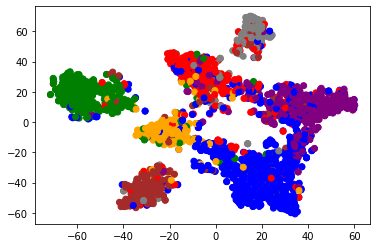

In [46]:
color_list = ["red", "orange", "green", "blue", "purple", "brown","grey"]

loader = DataLoader(dataset, batch_size=64, shuffle=True)
embs = []
colors = []
for batch in loader:
    emb, pred = model(batch)
    embs.append(emb)
    colors += [color_list[y] for y in batch.y]
embs = torch.cat(embs, dim=0)

xs, ys = zip(*TSNE().fit_transform(embs.detach().numpy()))
plt.scatter(xs, ys, color=colors)

#Learning unsupervised embeddings with graph autoencoders


Finally, GNNs fit nicely in the framework of other neural approaches, and can be used as part of autoencoder techniques, pretraining and multitask learning methods, etc. Here we explore the idea of neural network representations further by building a graph autoencoder which learns these representations in a completely unsupervised way. In contrast to the previous example, we do not make use of the given node labels when training this representation. Instead, we encode the nodes in our network in a low-dimensional space in such a way that the embeddings can be decoded into a reconstruction of the original network. We use graph convolutional layers in the encoder.

You can again use TensorBoardX here to visualize the training progress.

In [49]:
class Encoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Encoder, self).__init__()
        self.conv1 = pyg_nn.GCNConv(in_channels, 2 * out_channels, cached=True)
        self.conv2 = pyg_nn.GCNConv(2 * out_channels, out_channels, cached=True)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)

def train(epoch):
    model.train()
    optimizer.zero_grad()
    z = model.encode(x, train_pos_edge_index)
    loss = model.recon_loss(z, train_pos_edge_index)
    loss.backward()
    optimizer.step()
    
    writer.add_scalar("loss", loss.item(), epoch)

def test(pos_edge_index, neg_edge_index):
    model.eval()
    with torch.no_grad():
        z = model.encode(x, train_pos_edge_index)
    return model.test(z, pos_edge_index, neg_edge_index)

writer = SummaryWriter("./log/" + datetime.now().strftime("%Y%m%d-%H%M%S"))

dataset = Planetoid("/tmp/citeseer", "Citeseer", T.NormalizeFeatures())
data = dataset[0]

channels = 16
dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('CUDA availability:', torch.cuda.is_available())

# encoder: written by us; decoder: default (inner product)
model = pyg_nn.GAE(Encoder(dataset.num_features, channels)).to(dev)
labels = data.y
data.train_mask = data.val_mask = data.test_mask = data.y = None
data = model.split_edges(data)
x, train_pos_edge_index = data.x.to(dev), data.train_pos_edge_index.to(dev)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1, 201):
    train(epoch)
    auc, ap = test(data.test_pos_edge_index, data.test_neg_edge_index)
    writer.add_scalar("AUC", auc, epoch)
    writer.add_scalar("AP", ap, epoch)
    if epoch % 10 == 0:
        print('Epoch: {:03d}, AUC: {:.4f}, AP: {:.4f}'.format(epoch, auc, ap))

AttributeError: ignored

Finally, we plot our embeddings (the output of the encoder) with TSNE. We color each node embedding according to its label -- but note that we did not use any label information when training our encoder. Nodes with the same label are nevetheless close together in the embedding space. The model has learned the community structure without supervision!

In [ ]:
model.eval()
z = model.encode(x, train_pos_edge_index)
colors = [color_list[y] for y in labels]

xs, ys = zip(*TSNE().fit_transform(z.cpu().detach().numpy()))
plt.scatter(xs, ys, color=colors)
plt.show()

#Demo

In [ ]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
Data(edge_index=[2, 4], x=[3, 1])

Hàm Loss Negative Log-Likelihood
torch.nn.NLLLoss

NLLLoss được xác định bởi công thức:
   loss = -(log y)

NLLLost formula
Ý nghĩa của NLLLoss
Hàm này tối đa hóa xác suất tổng thể của dữ liệu. Nó sẽ phạt mô hình khi dự đoán lớp đầu ra mong muốn với xác suất nhỏ. Hàm log giúp hiện thực hóa việc phạt, các xác suất là các giá trị số nhỏ hơn 1, do đó số đối của giá trị log là số dương, xác suất càng nhỏ, giá trị loss càng lớn.